We trying

In [131]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn as sk
import scipy as sp
from scipy import signal
from copy import deepcopy
import math

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.decomposition import PCA

In [132]:
# Force divider function
def force_divider(x):
    k_outer = 3.738
    k_inner = 0.368
    dist = x/k_inner
    return (k_outer + k_inner)*dist

# FSR model function
def FSR_model(x):
    return 131.2*np.exp(0.7801*x)/1000

# Return a numpy array containing the differential between consecutive elements (approximation of slope) 
# in a given data array
def slope(dataVector):
    dydx = []
    for i in range(1, len(dataVector)):
        diff = dataVector[i] - dataVector[i-1]
        dydx.append(diff)
    finalDiff = dataVector[i] - dataVector[i-1] # Added just to make the final array the proper dimensions 
    dydx.append(finalDiff)
    return np.array(dydx)

# Return a numpy array containing the value and index of the largest magnitude value in given data array (first instance)
def largest(dataVector):
    val = max(abs(dataVector))
    ind = 0
    for k in dataVector:
        if abs(k) == val:
            return np.array([val, ind])
        else:
            ind += 1

In [133]:
# Labels
    # Fall = 1
    # Impact = 2
    # Nothing = 3
    # Squeeze = 4
    
# Add Fall data
string = "/Users/alber/Desktop/BEST/Tensegrity-HRI/DataV2/fall"
numbers = np.arange(1,15)
fsrData = []
accelData = []
totData = []
for num in numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    fsrFall = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                 "FSR_12"]]
    accelFall = d[["ACC_X", "ACC_Y", "ACC_Z"]]
    totFall = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                 "FSR_12", "ACC_X", "ACC_Y", "ACC_Z"]]
    fsrFall = fsrFall.to_numpy()
    accelFall = accelFall.to_numpy()
    totFall = totFall.to_numpy()
    fsrData.append(fsrFall)
    accelData.append(accelFall)
    totData.append(totFall)

    
# Add Impact data
string = "/Users/alber/Desktop/BEST/Tensegrity-HRI/DataV2/impact"
for num in numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    fsrImp = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                "FSR_12"]]
    accelImp = d[["ACC_X", "ACC_Y", "ACC_Z"]]
    totImp = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                 "FSR_12", "ACC_X", "ACC_Y", "ACC_Z"]]
    fsrImp = fsrImp.to_numpy()
    accelImp = accelImp.to_numpy()
    totImp = totImp.to_numpy()
    fsrData.append(fsrImp)
    accelData.append(accelImp)
    totData.append(totImp)

    
# Add Nothing data
string = "/Users/alber/Desktop/BEST/Tensegrity-HRI/DataV2/nothing"
for num in numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    fsrNoth = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                 "FSR_12"]]
    accelNoth = d[["ACC_X", "ACC_Y", "ACC_Z"]]
    totNoth = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                 "FSR_12", "ACC_X", "ACC_Y", "ACC_Z"]]
    fsrNoth = fsrNoth.to_numpy()
    accelNoth = accelNoth.to_numpy()
    totNoth = totNoth.to_numpy()
    fsrData.append(fsrNoth)
    accelData.append(accelNoth)
    totData.append(totNoth)
    
# Add Squeeze data
string = "/Users/alber/Desktop/BEST/Tensegrity-HRI/DataV2/squeeze"
for num in numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    fsrSqueeze = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                 "FSR_12"]]
    accelSqueeze = d[["ACC_X", "ACC_Y", "ACC_Z"]]
    totSqueeze = d[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", 
                 "FSR_12", "ACC_X", "ACC_Y", "ACC_Z"]]
    fsrSqueeze = fsrSqueeze.to_numpy()
    accelSqueeze = accelSqueeze.to_numpy()
    totSqueeze = totSqueeze.to_numpy()
    fsrData.append(fsrSqueeze)
    accelData.append(accelSqueeze)
    totData.append(totSqueeze)

#print(np.shape(fsrData))
#print(np.shape(accelData))
#print(np.shape(totData))
#print(fsrData[0][0:10, :])
#print(totData[0][0:10, :])

In [134]:
# Convert fsr data to Newtons
placeHold = []
for m in fsrData:
    m = force_divider(FSR_model(m *5/1023))  
    placeHold.append(m)

for k in totData:
    k[:, 0:12] = force_divider(FSR_model(k[:, 0:12] *5/1023))

fsrData = placeHold
#print(np.shape(totData))
#print(fsrData[0][0:10, :])
#print("\n")
#print(totData[0][0:10, :])

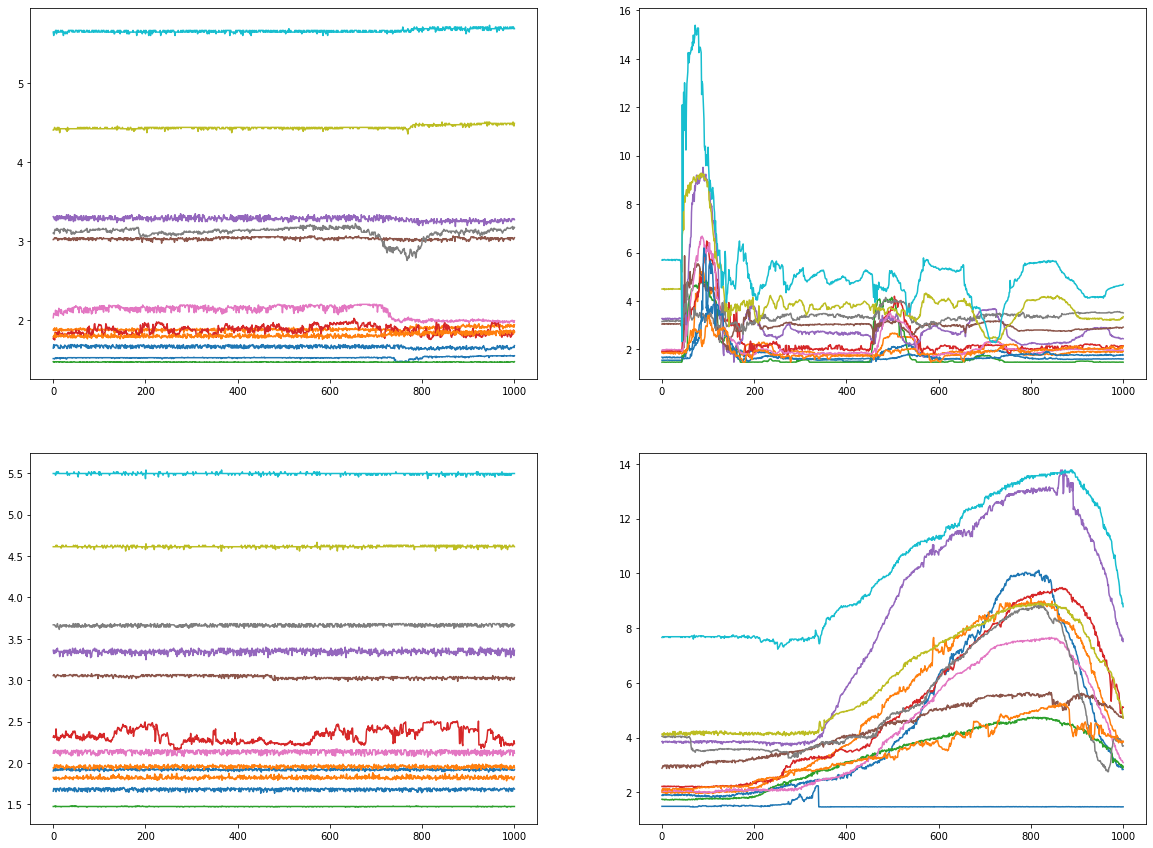

In [135]:
# Plot FSR data (Taking first tests as example)
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.plot(fsrData[0])
plt.subplot(222)
plt.plot(fsrData[14])
plt.subplot(223)
plt.plot(fsrData[28])
plt.subplot(224)
plt.plot(fsrData[42])

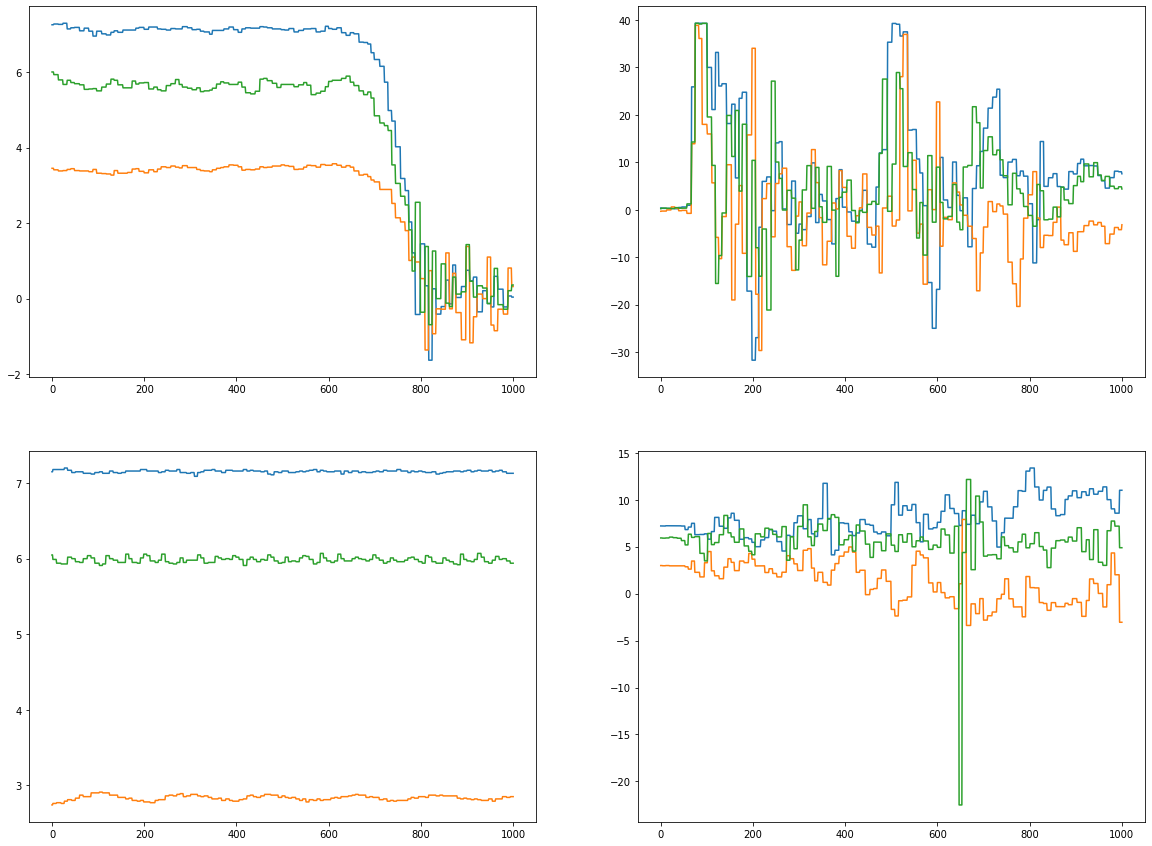

In [136]:
# Plot Accel data
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.plot(accelData[0])
plt.subplot(222)
plt.plot(accelData[14])
plt.subplot(223)
plt.plot(accelData[28])
plt.subplot(224)
plt.plot(accelData[42])

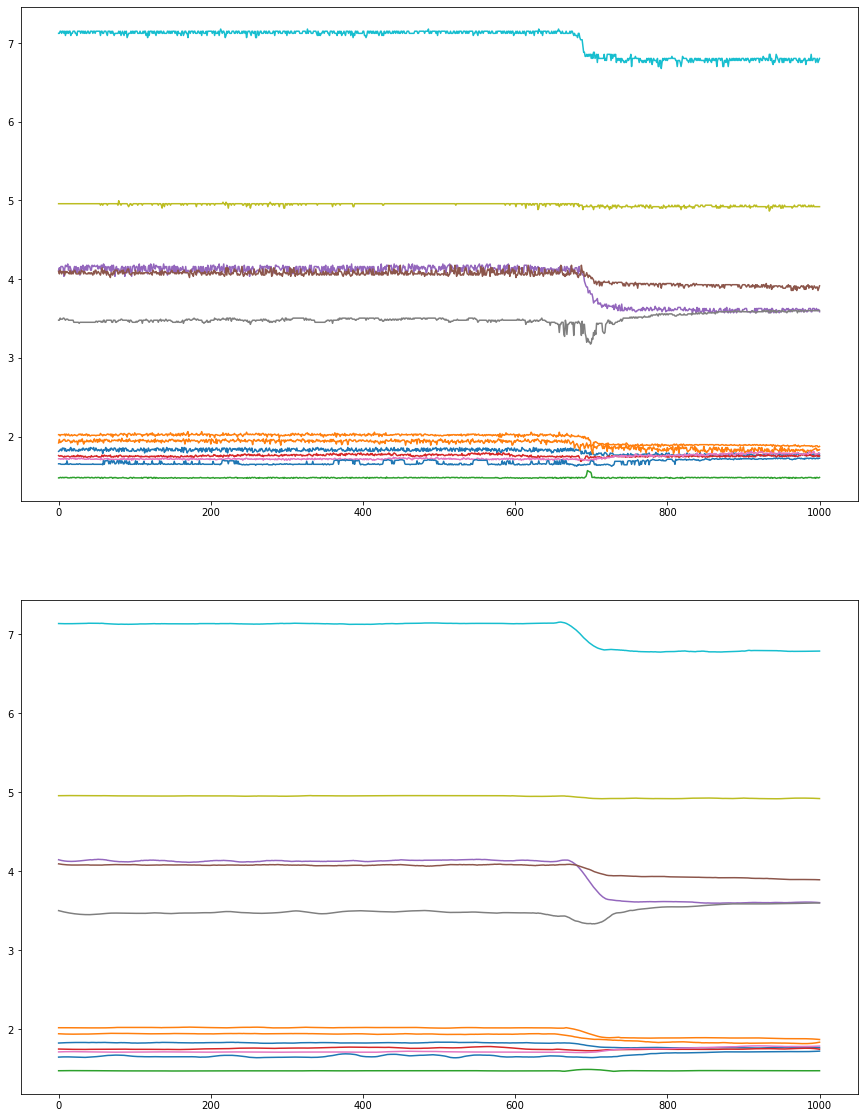

In [137]:
# Try smoothing out fsr data

fsrRefined = deepcopy(fsrData)

for test in fsrRefined:
    for k in range(0, 12):
        test[:, k] = signal.savgol_filter(test[:, k], 71, 3)       

plt.figure(figsize = (15,20))
plt.subplot(211)
for i in range(0, 12):
    plt.plot(fsrData[1][:, i])
plt.subplot(212)
for i in range(0, 12):
    plt.plot(fsrRefined[1][:, i])

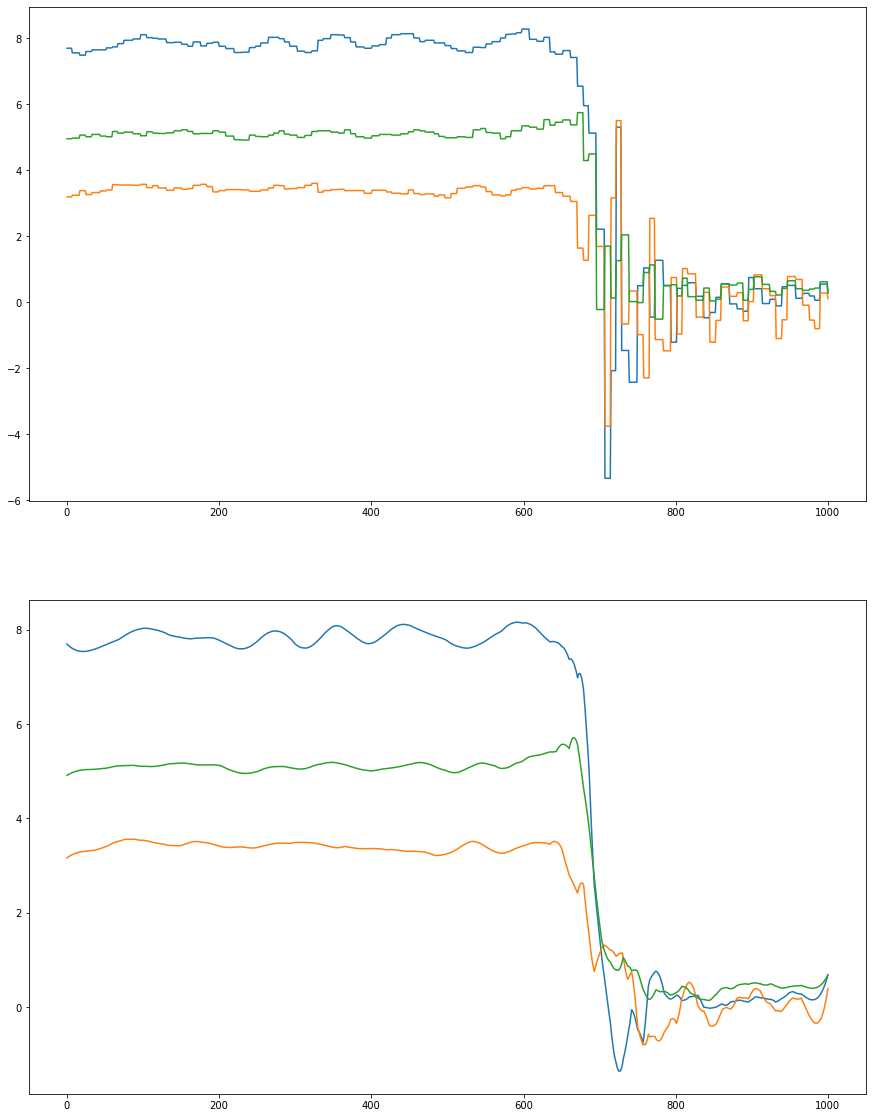

In [138]:
# Try smoothing out acceleration data
accelRefined = deepcopy(accelData)

for test in accelRefined:
    for k in range(0, 3):
        test[:, k] = signal.savgol_filter(test[:, k], 71, 3)       

plt.figure(figsize = (15,20))
plt.subplot(211)
for i in range(0, 3):
    plt.plot(accelData[1][:, i])
plt.subplot(212)
for i in range(0, 3):
    plt.plot(accelRefined[1][:, i])

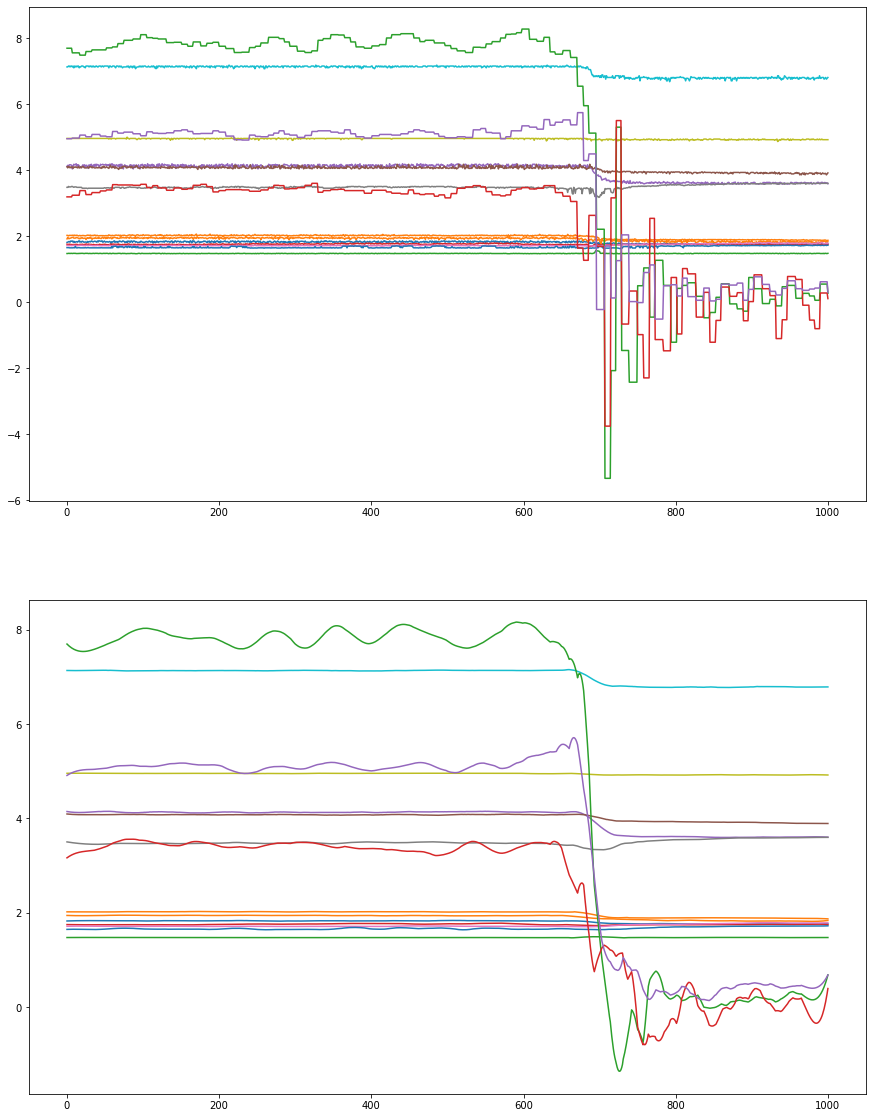

In [139]:
# Try smoothing out total Data
totRefined = deepcopy(totData)

for test in totRefined:
    for k in range(0, 15):
        test[:, k] = signal.savgol_filter(test[:, k], 71, 3)       

plt.figure(figsize = (15,20))
plt.subplot(211)
for i in range(0, 15):
    plt.plot(totData[1][:, i])
plt.subplot(212)
for i in range(0, 15):
    plt.plot(totRefined[1][:, i])

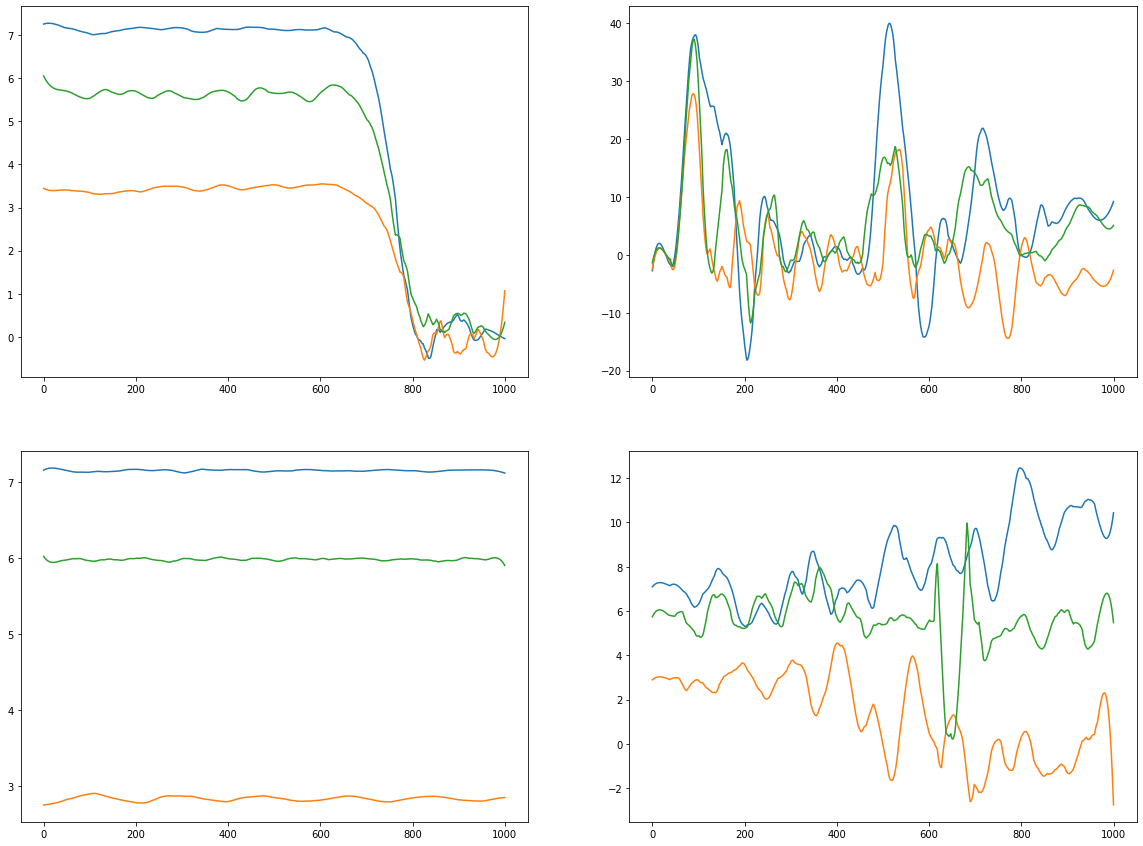

In [140]:
# Look at acceleration data of four types of tests
plt.figure(figsize=(20,15))
plt.subplot(221)
for i in range(0, 3):
    plt.plot(accelRefined[0][:, i])
plt.subplot(222)
for i in range(0, 3):
    plt.plot(accelRefined[14][:, i])  
plt.subplot(223)
for i in range(0, 3):
    plt.plot(accelRefined[28][:, i])  
plt.subplot(224)
for i in range(0, 3):
    plt.plot(accelRefined[42][:, i])  

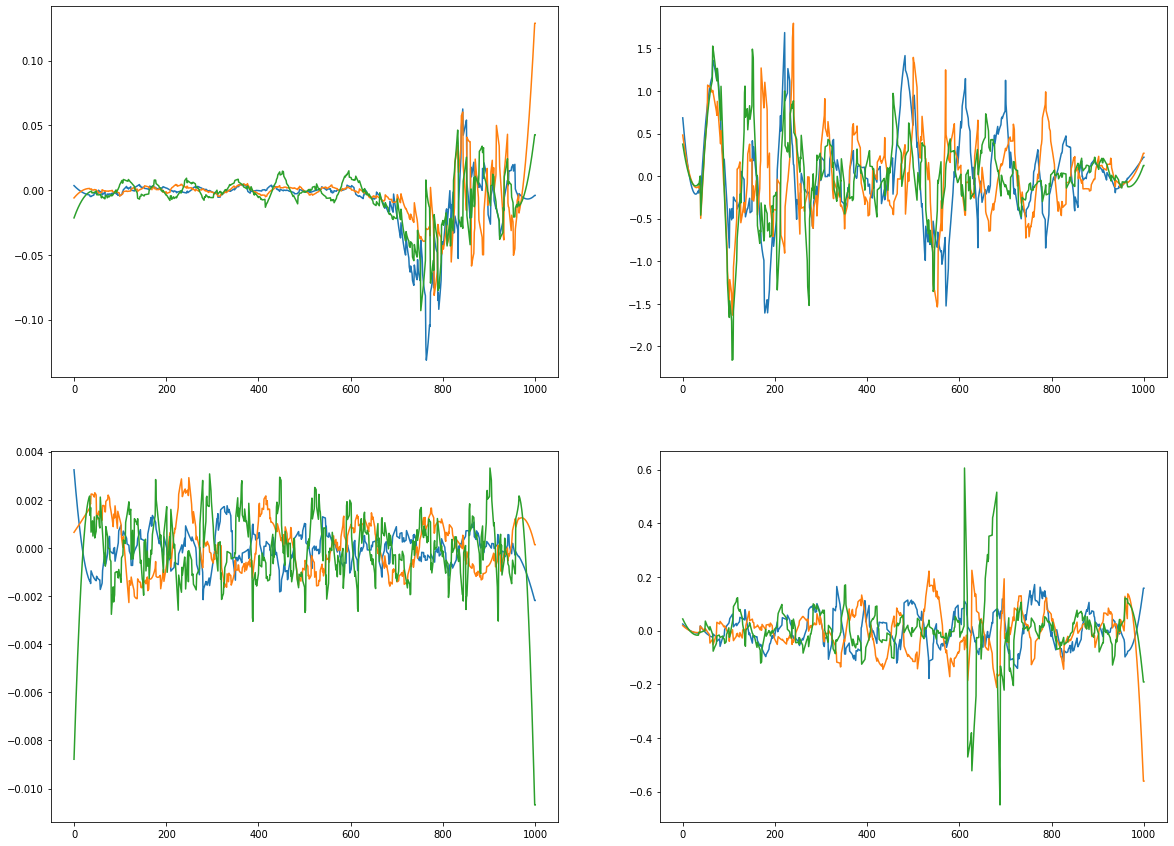

In [141]:
# Generate slope vectors for accel data, plot
accelSlopes = []
for i in range(0, 56):
    accelVec = slope(accelRefined[i])
    accelSlopes.append(accelVec)

#print(np.shape(accelSlopes))
plt.figure(figsize=(20,15))
plt.subplot(221)
for i in range(0, 3):
    plt.plot(accelSlopes[0][:, i])
plt.subplot(222)
for i in range(0, 3):
    plt.plot(accelSlopes[14][:, i])  
plt.subplot(223)
for i in range(0, 3):
    plt.plot(accelSlopes[28][:, i])  
plt.subplot(224)
for i in range(0, 3):
    plt.plot(accelSlopes[42][:, i])  

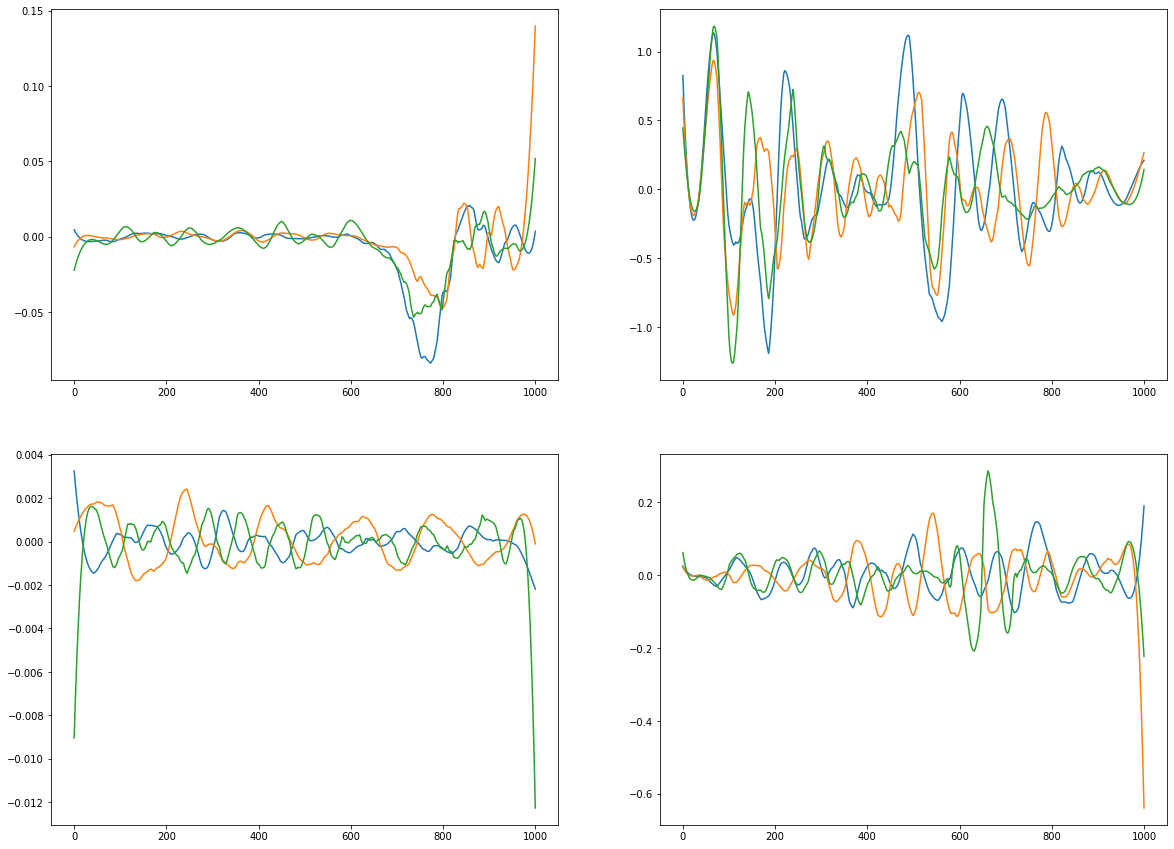

In [142]:
# Clean acceleration slope data

slopeRefined = deepcopy(accelSlopes)

for test in slopeRefined:
    for k in range(0, 3):
        test[:, k] = signal.savgol_filter(test[:, k], 71, 3)  

plt.figure(figsize=(20,15))
plt.subplot(221)
for i in range(0, 3):
    plt.plot(slopeRefined[0][:, i])
plt.subplot(222)
for i in range(0, 3):
    plt.plot(slopeRefined[14][:, i])  
plt.subplot(223)
for i in range(0, 3):
    plt.plot(slopeRefined[28][:, i])  
plt.subplot(224)
for i in range(0, 3):
    plt.plot(slopeRefined[42][:, i])  

In [143]:
# Create combinations of data arrays
# Arrays that matter: fsrRefined, accelRefined, slopeRefined, totRefined

#print(np.shape(totRefined))
#print(np.shape(fsrRefined))
#print(np.shape(accelRefined))
#print(np.shape(slopeRefined))

totSlope = []
for i in range(0, 56):
    combinedData = np.append(totRefined[i], slopeRefined[i], axis = 1)
    totSlope.append(combinedData)

fsrSlope = []
for i in range(0, 56):
    combinedData = np.append(fsrRefined[i], slopeRefined[i], axis = 1)
    fsrSlope.append(combinedData)

accelAndSlope = []
for i in range(0, 56):
    combinedData = np.append(accelRefined[i], slopeRefined[i], axis = 1)
    accelAndSlope.append(combinedData)
    
#print(np.shape(totSlope))
#print(np.shape(fsrSlope))
#print(np.shape(accelAndSlope))

In [144]:
# Labels!

l1 = np.ones((14,), dtype=int) 
l2 = 2*np.ones((14,), dtype=int) 
l3 = 3*np.ones((14,), dtype=int)
l4 = 4*np.ones((14,), dtype=int)
labels = np.concatenate((l1, l2, l3, l4), axis=0)


# Prepare data for algorithms
nsamples, nx, ny = np.shape(totSlope)
reformated_data = np.reshape(totSlope,(nsamples, nx*ny))
[X_train, X_test, y_train, y_test] = train_test_split(reformated_data, labels, random_state=0)

In [145]:
# Gaussian Naive-Bayes
model = GaussianNB().fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print("Predicted labels = " + str(model.predict(X_test)))
print("Correct labels =   " + str(y_test))

1.0
1.0
Predicted labels = [4 3 3 2 1 1 3 4 4 3 1 1 3 2]
Correct labels =   [4 3 3 2 1 1 3 4 4 3 1 1 3 2]


In [146]:
# Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print("Predicted labels = " + str(rf.predict(X_test)))
print("Correct labels =   " + str(y_test))

1.0
0.6428571428571429
Predicted labels = [4 2 3 1 1 1 3 4 4 3 1 3 1 1]
Correct labels =   [4 3 3 2 1 1 3 4 4 3 1 1 3 2]


C:\Users\alber\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


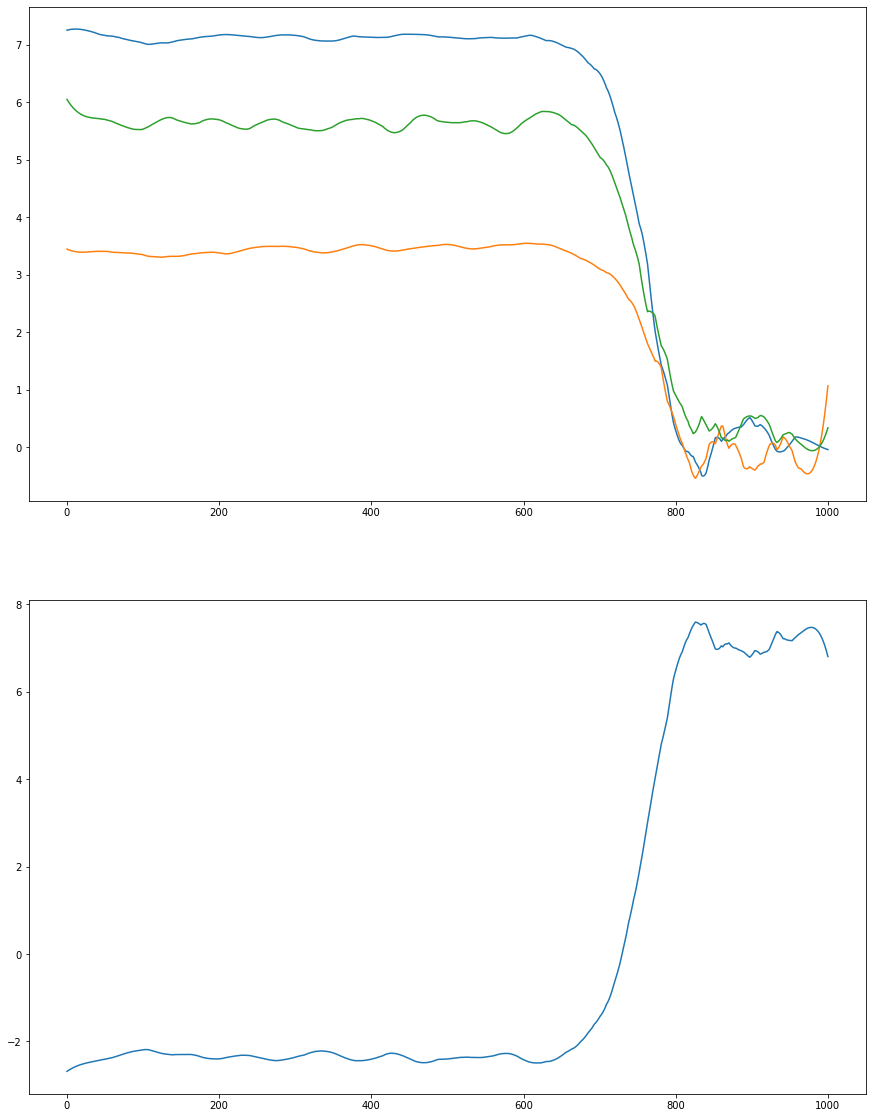

In [149]:
# Try PCA on accelerometer data

pcaAccel = deepcopy(accelRefined)
pca = PCA(n_components = 1)
plt.figure(figsize=(15,20))
plt.subplot(211)
plt.plot(accelRefined[0])

plt.subplot(212)
for i in range(0, 56):
    pcaAccel[i] = pca.fit_transform(pcaAccel[i])
plt.plot(pcaAccel[0])

In [150]:
# Run script on pcaAccel

# Prepare data for algorithms
nsamples2, nx2, ny2 = np.shape(pcaAccel)
reformated_data2 = np.reshape(pcaAccel,(nsamples2, nx2*ny2))
[X_train2, X_test2, y_train2, y_test2] = train_test_split(reformated_data2, labels, random_state=0)

# Gaussian Naive-Bayes
model2 = GaussianNB().fit(X_train2, y_train2)
print(model2.score(X_train2, y_train2))
print(model2.score(X_test2, y_test2))
print("Predicted labels = " + str(model2.predict(X_test2)))
print("Correct labels =   " + str(y_test2))

1.0
1.0
Predicted labels = [4 3 3 2 1 1 3 4 4 3 1 1 3 2]
Correct labels =   [4 3 3 2 1 1 3 4 4 3 1 1 3 2]
